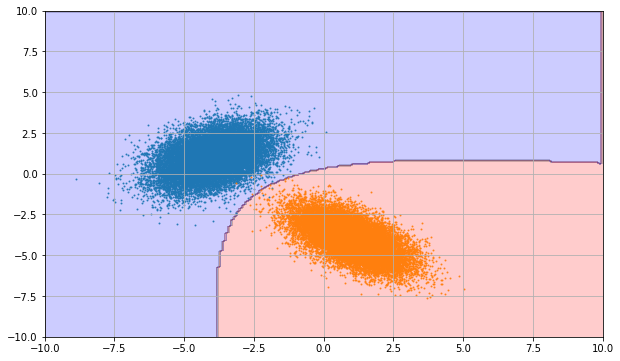

In [16]:
from matplotlib import pyplot as plt
import numpy as np

def plot_boundaries():
  G       = 200
  x       = np.linspace(-10, 10, G)
  y       = np.linspace(-10, 10, G)
  xv, yv  = np.meshgrid(x, y)
  F       = np.zeros((G,G))
  for k in range(0,G-1):
    for m in range(0,G-1):
      x = np.array([ [xv[k,m]], [yv[k,m]] ])
      phi1 = -x.T @ invSigma1 @ x + x.T @ invSigma1 @ mu1 + mu1.T @ invSigma1 @ x - mu1.T @ invSigma1 @ mu1 - detSigma1
      phi2 = -x.T @ invSigma2 @ x + x.T @ invSigma2 @ mu2 + mu2.T @ invSigma2 @ x - mu2.T @ invSigma2 @ mu2 - detSigma2
      F[k,m] = phi1 > phi2
  plt.contourf( xv, yv, F, colors=['red','black','blue','gray'], alpha=0.2 )


N         = 20000
mu1       = np.array([ [-4], [1] ])
mu2       = np.array([ [1], [-4] ])
sigma1    = np.array([ [1, 0.4], [0.4, 1] ])
sigma2    = np.array([ [1, -0.6], [-0.6, 1] ])
invSigma1 = np.linalg.inv(sigma1) 
invSigma2 = np.linalg.inv(sigma2) 
detSigma1 = np.log(np.linalg.det(sigma1))
detSigma2 = np.log(np.linalg.det(sigma2))

s1     = np.linalg.cholesky( sigma1 )
s2     = np.linalg.cholesky( sigma2 )


#print(np.shape(mu1))
vmu1    = np.tile(mu1,(1,N))
#print(np.shape(mu1))
x1     = s1 @ np.random.randn(2,N) + vmu1

vmu2    = np.tile(mu2,(1,N))
x2     = s2 @ np.random.randn(2,N) + vmu2

# Bayesian classifier
phi   = np.zeros((2,N))
rand_x = np.random.rand(2,N)*20 -10
for k in range(0,N-1):
  phi[0,k] = -rand_x[:,k].T @ invSigma1 @ rand_x[:,k] + rand_x[:,k].T @ invSigma1 @ mu1 + mu1.T @ invSigma1 @ rand_x[:,k] - mu1.T @ invSigma1 @ mu1 - detSigma1
  phi[1,k] = -rand_x[:,k].T @ invSigma2 @ rand_x[:,k] + rand_x[:,k].T @ invSigma2 @ mu2 + mu2.T @ invSigma2 @ rand_x[:,k] - mu2.T @ invSigma2 @ mu2 - detSigma2
  

fig = plt.figure(figsize=[10,6])

plot_boundaries()

plt.scatter( x1[0], x1[1], s=1, alpha=0.85  )
plt.scatter( x2[0], x2[1], s=1, alpha=0.85 )

plt.grid(True)